In [1]:
# Using data from Kaggle https://www.kaggle.com/competitions/datasciencebowl
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the directory path
data_dir = 'C:/Libros/Data Science/train'

# Define the image size and batch size
image_size = (192, 192)
batch_size = 32

In [2]:
# Define the input shape of the images (grayscale)
IMG_SHAPE = (192, 192, 1)
# Define a function to load and preprocess the images
def preprocess_image(img, label):
    # Resize the image to a square shape (filling with blank spaces)
    img = tf.image.resize_with_pad(img, IMG_SHAPE[0], IMG_SHAPE[1], method='bilinear')

    img= tf.cast(img, tf.float32) / 255.0

    return img, label

In [3]:
# Use the `image_dataset_from_directory()` function to generate the labeled dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 30336 files belonging to 121 classes.
Using 24269 files for training.


In [4]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 30336 files belonging to 121 classes.
Using 6067 files for validation.


In [5]:
# Print the class names
class_names = train_dataset.class_names
print(class_names)
print("Largest string: "+str(len(max(class_names, key=len))))

['acantharia_protist', 'acantharia_protist_big_center', 'acantharia_protist_halo', 'amphipods', 'appendicularian_fritillaridae', 'appendicularian_s_shape', 'appendicularian_slight_curve', 'appendicularian_straight', 'artifacts', 'artifacts_edge', 'chaetognath_non_sagitta', 'chaetognath_other', 'chaetognath_sagitta', 'chordate_type1', 'copepod_calanoid', 'copepod_calanoid_eggs', 'copepod_calanoid_eucalanus', 'copepod_calanoid_flatheads', 'copepod_calanoid_frillyAntennae', 'copepod_calanoid_large', 'copepod_calanoid_large_side_antennatucked', 'copepod_calanoid_octomoms', 'copepod_calanoid_small_longantennae', 'copepod_cyclopoid_copilia', 'copepod_cyclopoid_oithona', 'copepod_cyclopoid_oithona_eggs', 'copepod_other', 'crustacean_other', 'ctenophore_cestid', 'ctenophore_cydippid_no_tentacles', 'ctenophore_cydippid_tentacles', 'ctenophore_lobate', 'decapods', 'detritus_blob', 'detritus_filamentous', 'detritus_other', 'diatom_chain_string', 'diatom_chain_tube', 'echinoderm_larva_pluteus_brit

In [6]:
train_dataset = train_dataset.map(preprocess_image)
val_dataset = val_dataset.map(preprocess_image)

In [7]:
# Define the model architecture
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.15,fill_mode='constant',fill_value=1.0)
])
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

In [8]:
def split_label(label, max_length):
    if len(label) <= max_length:
        return label
    else:
        split_index = math.ceil(len(label) / 2)
        return label[:split_index] + "\n" + label[split_index:]

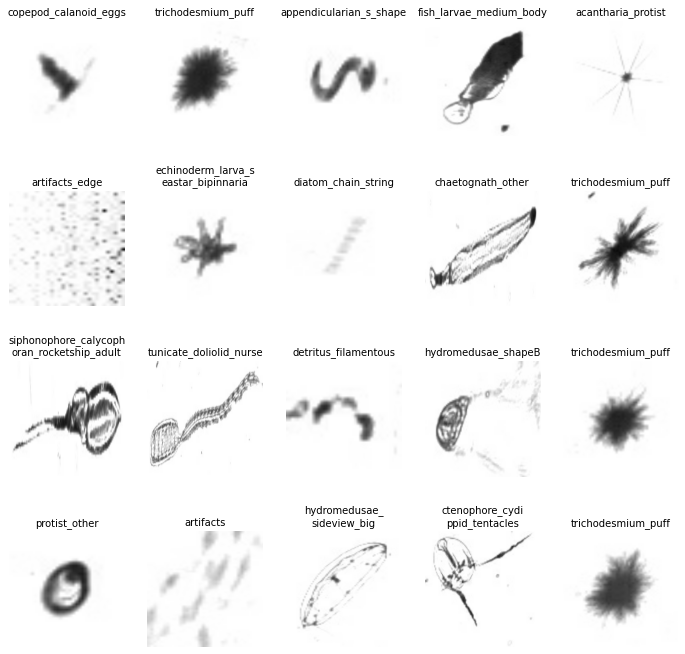

In [9]:
# Display the first 20 images in a grid
for images_disp, label_disp in train_dataset.take(1):
    fig, axs = plt.subplots(4, 5, figsize=(12, 12))
    axs = axs.flatten()
    for img, ax, label0 in zip(images_disp[:20], axs, label_disp[:20]):
        ax.imshow(img.numpy().astype('float32'))
        ax.axis('off')
        max_number = max(label0)
        max_index = np.where(label0 == max_number)
        ax.set_title(split_label(class_names[max_index[0][0]],23) , fontdict={'fontsize': 10})
    plt.show()

In [10]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Train the model
tf.get_logger().setLevel('ERROR')
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
759/759 [==============================] - 687s 902ms/step - loss: 3.0196 - accuracy: 0.2728 - val_loss: 2.2553 - val_accuracy: 0.4248
Epoch 2/10
759/759 [==============================] - 777s 1s/step - loss: 2.0943 - accuracy: 0.4328 - val_loss: 1.9155 - val_accuracy: 0.4828
Epoch 3/10
759/759 [==============================] - 850s 1s/step - loss: 1.8490 - accuracy: 0.4843 - val_loss: 1.8120 - val_accuracy: 0.5002
Epoch 4/10
759/759 [==============================] - 872s 1s/step - loss: 1.6668 - accuracy: 0.5283 - val_loss: 1.6747 - val_accuracy: 0.5349
Epoch 5/10
759/759 [==============================] - 753s 992ms/step - loss: 1.5667 - accuracy: 0.5507 - val_loss: 1.6631 - val_accuracy: 0.5405
Epoch 6/10
759/759 [==============================] - 756s 996ms/step - loss: 1.4541 - accuracy: 0.5753 - val_loss: 1.5340 - val_accuracy: 0.5719
Epoch 7/10
759/759 [==============================] - 756s 995ms/step - loss: 1.3713 - accuracy: 0.5971 - val_loss: 1.5429 - val_accu

In [12]:
import csv
import os

test_dir = 'C:/Libros/Data Science/test'
print(os.path.exists(test_dir))

True


In [13]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode=None,
    shuffle=False
)
print(len(test_dataset))

Found 130400 files belonging to 1 classes.
4075


In [14]:
def preprocess_image2(img):
    # Resize the image to a square shape (filling with blank spaces)
    img = tf.image.resize_with_pad(img, IMG_SHAPE[0], IMG_SHAPE[1], method='bilinear')

    img= tf.cast(img, tf.float32) / 255.0

    return img

In [15]:
test_dataset = test_dataset.map(preprocess_image2)

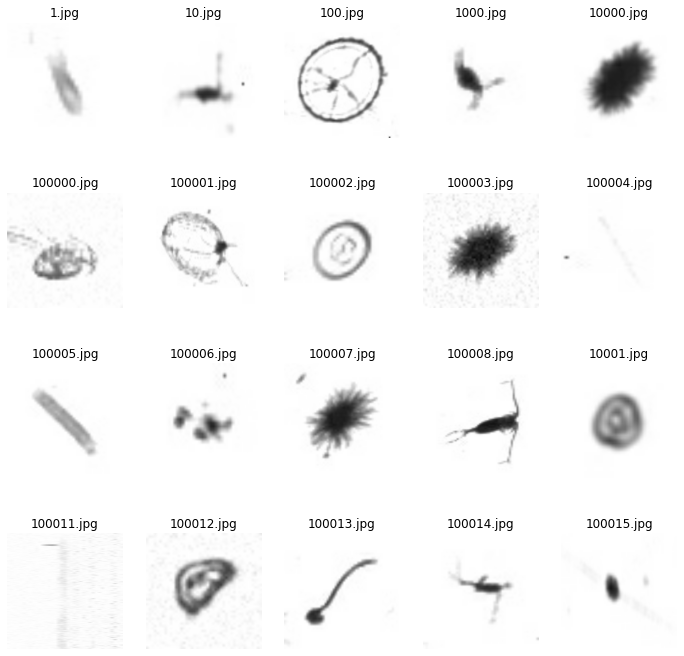

In [16]:
# Display the first 20 images in a grid
files_test = [os.path.join(test_dir+"/test", i) for i in os.listdir(test_dir+"/test")]
for images_disp in test_dataset.take(1):
    fig, axs = plt.subplots(4, 5, figsize=(12, 12))
    axs = axs.flatten()
    for j, (img, ax) in enumerate(zip(images_disp[:20], axs)):
        ax.imshow(img.numpy().astype('float32'))
        ax.axis('off')
        ax.set_title(os.path.basename(files_test[j]))
    plt.show()

In [17]:
# Evaluate the model on the test dataset
results = model.predict(test_dataset)

4075/4075 [==============================] - 872s 214ms/step


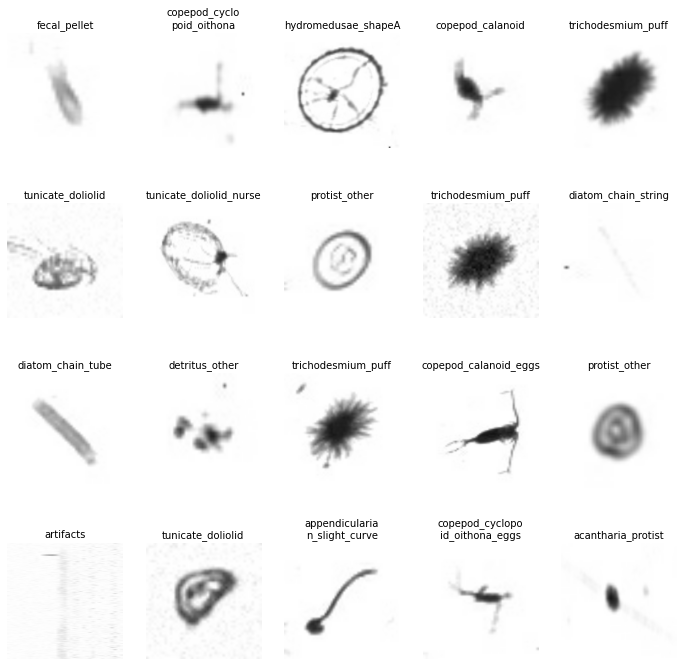

In [18]:
for images_disp in test_dataset.take(1):
    fig, axs = plt.subplots(4, 5, figsize=(12, 12))
    axs = axs.flatten()
    for j, (img, ax) in enumerate(zip(images_disp[:20], axs)):
        ax.imshow(img.numpy().astype('float32'))
        ax.axis('off')
        max_number = max(results[j])
        max_index = np.where(results[j] == max_number)
        ax.set_title(split_label(class_names[max_index[0][0]],23) , fontdict={'fontsize': 10})
    plt.show()

In [19]:
# Write the evaluation results to a CSV file

with open('C:/Libros/Data Science/evaluation3x3.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image'] + class_names)
    for i, filename in enumerate(files_test):
        image_class_probabilities = results[i]
        writer.writerow([os.path.basename(filename)] + list(image_class_probabilities))